In [1]:
import pyspark
sc = pyspark.SparkContext('local[*]')

### Bitcoin and gold price tendency plot
First of all what we're going to do is otain the plot where we're going to show the tendency of the bitcoin and gold price on each date we have data

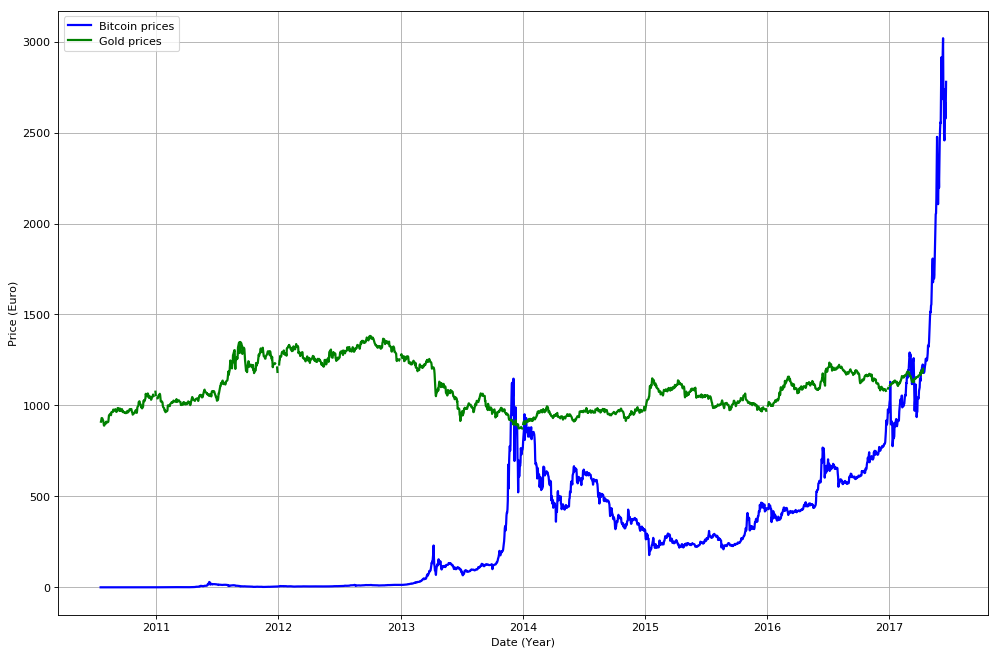

In [117]:
import os, shutil
import json
import datetime as dt
from operator import itemgetter

gold_input = sc.textFile("gold_historic.json")
bitcoin_input = sc.textFile("bitcoin_historic.json")

gold_data = gold_input.map(lambda x: json.loads(x))
bitcoin_data = bitcoin_input.map(lambda x: json.loads(x))

filtered_gold_data = gold_data.map(lambda t: t["dataset"]['data'])
filtered_bitcoin_data = bitcoin_data.map(lambda data: data["bpi"])


bitcoin_prices = [] 
for r in filtered_bitcoin_data.toLocalIterator():
    for date in r:
        price = filtered_bitcoin_data.map(lambda data: data[str(date)]).take(1)[0]
        #print "--> ",date, ":", price
        bitcoin_prices.append(price)

dates2 = sc.parallelize(filtered_bitcoin_data.first())
dates2_r = dates2.map(lambda l: dt.datetime.strptime(l,'%Y-%m-%d').date()).collect()

tuples = zip(dates2_r, bitcoin_prices)
tuples.sort(key=itemgetter(0))

bit_dates = []
bit_prices = []
for t in tuples:
    #print t[0], "--> ",t[1]
    bit_dates.append(t[0])
    bit_prices.append(t[1])      
    
new_rdd = sc.parallelize(filtered_gold_data.first())
gold_data = new_rdd.map(lambda r: (str(r[0]), r[6]))
dates1 = gold_data.map(lambda r: (dt.datetime.strptime(r[0],'%Y-%m-%d').date())).collect()
gold_prices = gold_data.map(lambda r: r[1]).collect()



plot_prices()


In [116]:
def plot_prices():
    import numpy as np
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as pl
    
    pl.figure(figsize=(15,10), dpi=80, facecolor='white', edgecolor='k')
    pl.plot(bit_dates,bit_prices,linewidth=2,color='blue',label='Bitcoin prices')
    pl.plot(dates1,gold_prices,linewidth=2,color='green',label='Gold prices')
    pl.legend()
    pl.xlabel('Date (Year)')
    pl.ylabel('Price (Euro)')
    pl.grid()
    pl.show()

### Exchange historical plot
Second thing to analyze is the historical exchange values, what it means see what have happened in markets during all the years and see if the losses are related with bitcoin losses or not

In [147]:
def get_data(filename):
    df = sql.read.load(filename, 
                 format='com.databricks.spark.csv', 
                 header='true', 
                 inferSchema='true')
    
    rdd = df.rdd.map(list)
    l1 = rdd.map(lambda r: (r[0],r[7]))

    k = l1.map(lambda d: d[0]).collect()
    v = l1.map(lambda d: d[1]).collect()

    return k, v

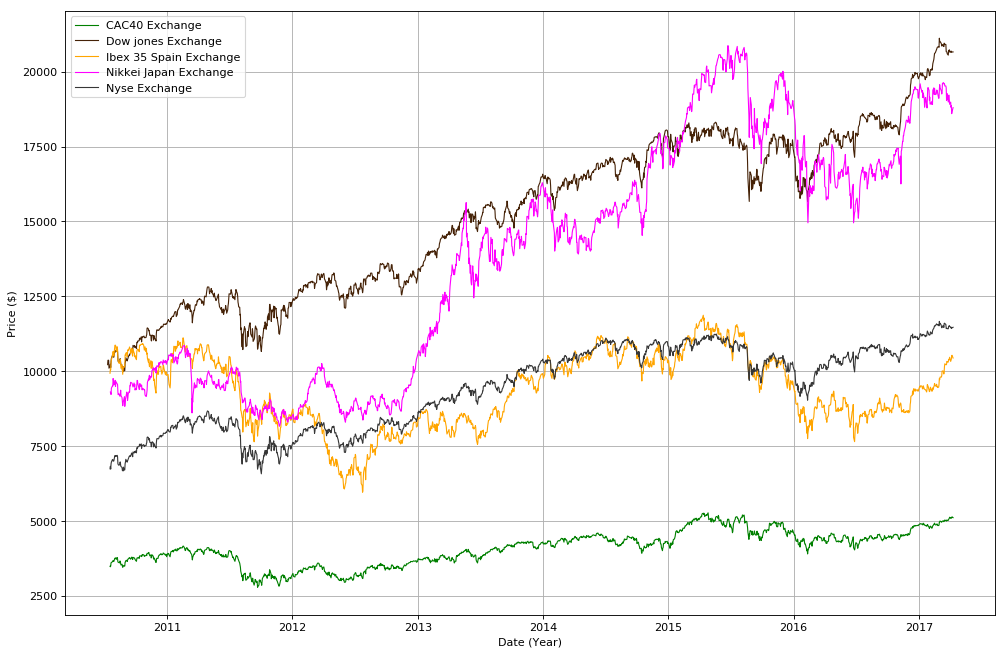

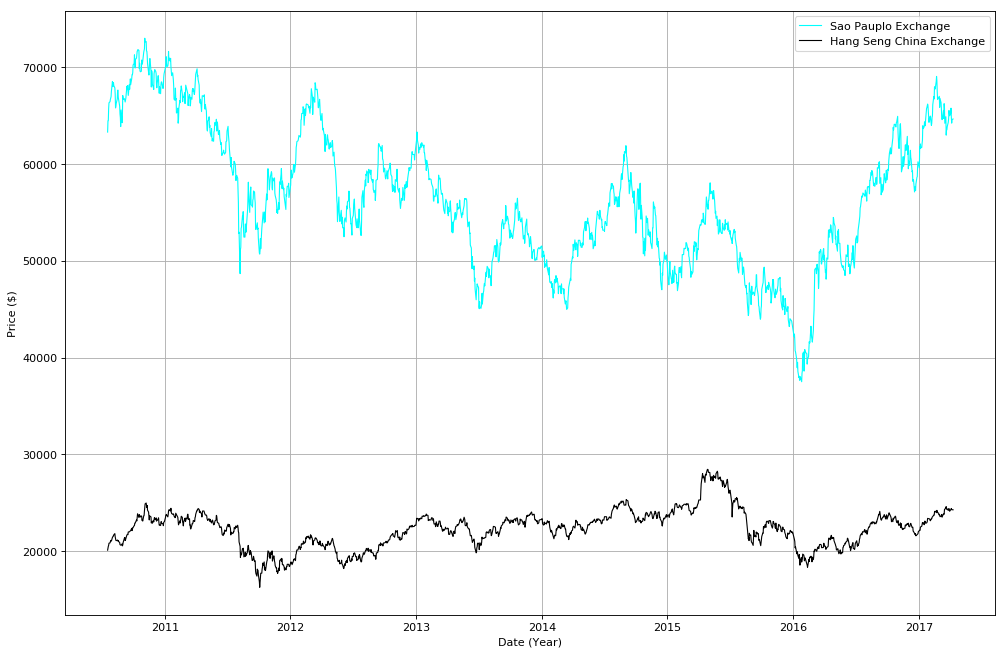

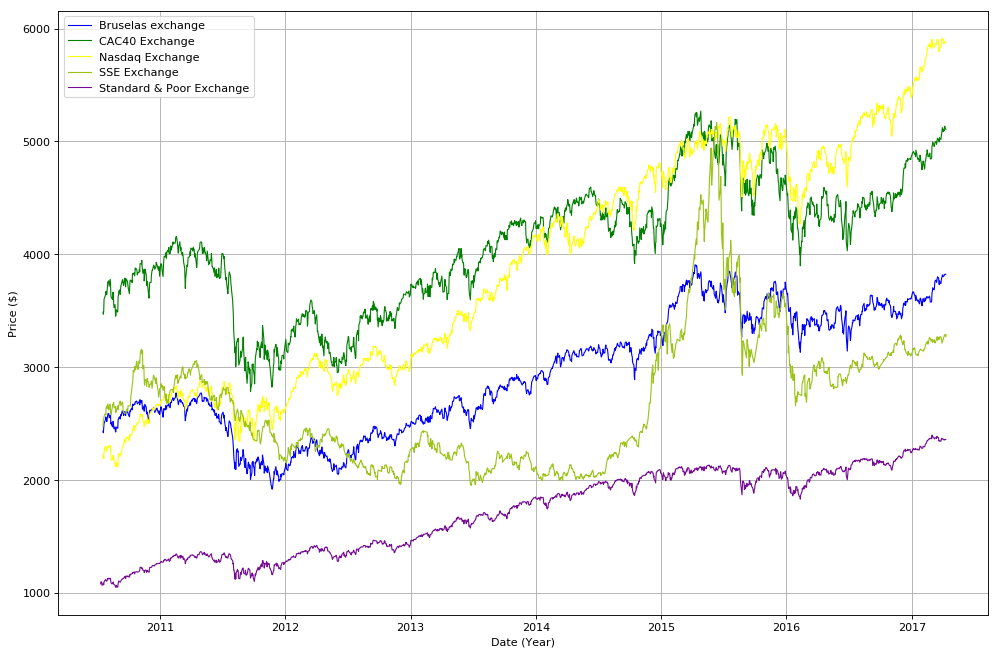

In [161]:
import os
import datetime as dt
import pandas as pd

sql = pyspark.SQLContext(sc)

d1, v1 = get_data("historical_exchange_filtered/bruselasExchange.csv")
d2, v2 = get_data("historical_exchange_filtered/cac40Exchange.csv")
d3, v3 = get_data("historical_exchange_filtered/dowjonesExchange.csv")
d4, v4 = get_data("historical_exchange_filtered/daxGermanyExxhange.csv")
d5, v5 = get_data("historical_exchange_filtered/hangSengChinaExchange.csv")
d6, v6 = get_data("historical_exchange_filtered/ibex35Exchange.csv")
d7, v7 = get_data("historical_exchange_filtered/nasdaqExchange.csv")
d8, v8 = get_data("historical_exchange_filtered/nikkei_japanExchange.csv")
d9, v9 = get_data("historical_exchange_filtered/nyseExchange.csv")
d10, v10 = get_data("historical_exchange_filtered/saoPauloExchange.csv")
d11, v11 = get_data("historical_exchange_filtered/sse_historical.csv")
d12, v12 = get_data("historical_exchange_filtered/Standard-Poor-s_historical.csv")

plot_historical_exchange()
plot_historical_exchange2()
plot_historical_exchange3()

#### We finally diceded to create the plot in 3 parts because the global one is too big and it's difficult to see clearly the ups and downs of the values of each exchange

In [158]:
def plot_historical_exchange():
    import numpy as np
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as pl
    
    pl.figure(figsize=(15,10), dpi=80, facecolor='white', edgecolor='k')
    
    pl.plot(d2,v2,linewidth=1,color='green',label='CAC40 Exchange')
    pl.plot(d3,v3,linewidth=1,color='#452207',label='Dow jones Exchange')
    pl.plot(d6,v6,linewidth=1,color='orange',label='Ibex 35 Spain Exchange')
    pl.plot(d8,v8,linewidth=1,color='magenta',label='Nikkei Japan Exchange')
    pl.plot(d9,v9,linewidth=1,color='#373737',label='Nyse Exchange')
    
    pl.legend()
    pl.xlabel('Date (Year)')
    pl.ylabel('Price ($)')
    pl.grid()
    pl.show()
    
    

In [159]:
def plot_historical_exchange2():
    import numpy as np
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as pl
    
    pl.figure(figsize=(15,10), dpi=80, facecolor='white', edgecolor='k')
    
    pl.plot(d10,v10,linewidth=1,color='cyan',label='Sao Pauplo Exchange')
    pl.plot(d5,v5,linewidth=1,color='black',label='Hang Seng China Exchange')
    
    pl.legend()
    pl.xlabel('Date (Year)')
    pl.ylabel('Price ($)')
    pl.grid()
    pl.show()

In [160]:
def plot_historical_exchange3():
    import numpy as np
    import matplotlib.mlab as mlab
    import matplotlib.pyplot as pl
    
    pl.figure(figsize=(15,10), dpi=80, facecolor='white', edgecolor='k')
    
    pl.plot(d1,v1,linewidth=1,color='blue',label='Bruselas exchange')
    pl.plot(d2,v2,linewidth=1,color='green',label='CAC40 Exchange')
    pl.plot(d7,v7,linewidth=1,color='yellow',label='Nasdaq Exchange')
    pl.plot(d11,v11,linewidth=1,color='#9BC316',label='SSE Exchange')
    pl.plot(d12,v12,linewidth=1,color='#750A95',label='Standard & Poor Exchange')
    
    pl.legend()
    pl.xlabel('Date (Year)')
    pl.ylabel('Price ($)')
    pl.grid()
    pl.show()

### The last plot to create is the one related with the number of tweets related with bitcoins for each day of the list of days available in the extracted data in the first delivery